# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [9]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In One dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1)xndim` array representing the trajectory of the walker, including the starting point. 

In [11]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        for i in range(0,n+1):
            positions[i]=self.pos
            self.pos+= walker.pickStep(self)
        return positions

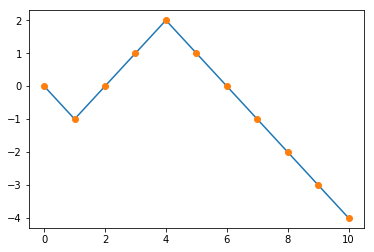

In [12]:
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test)
plt.plot(range(11),reference,'o')
assert (pos_test == reference).all()

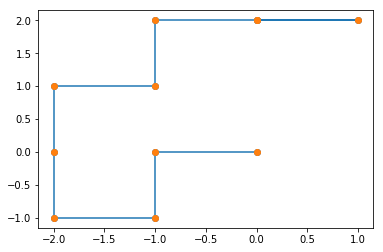

In [13]:
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o')
plt.plot(reference[:,0],reference[:,1],'o')
assert (pos_test == reference).all()

This is a plot to visualise trajectories.

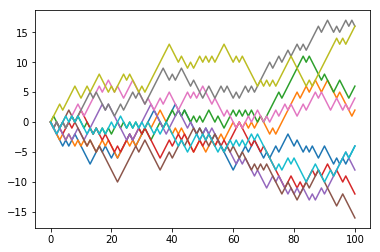

In [14]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels.


1001


Text(0.5,1,'Average position and average squared position for 100 random walkers doing 1000 steps')

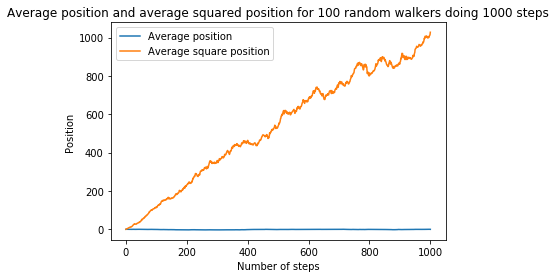

In [41]:
nsteps = 1000
ndim = 1
nwalkers = 100
positionn = []
squaredpositionn = []
for i in range(100):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    positionn.append(ys)
    ysq = [i**2 for i in ys]
    squaredpositionn.append(ysq)
positionn = numpy.array(positionn)
squaredpositionn = numpy.array(squaredpositionn)
averagepositionn = [numpy.mean(positionn[:,i]) for i in range(1001)]
averagesquaredpositionn = [numpy.mean(squaredpositionn[:,i]) for i in range(1001)]
print(len(averagepositionn))
plt.plot(range(nsteps+1),averagepositionn,label="Average position")
plt.plot(range(nsteps+1),averagesquaredpositionn,label="Average square position")
plt.legend(loc="best")
plt.xlabel("Number of steps")
plt.ylabel("Position")
plt.title("Average position and average squared position for 100 random walkers doing 1000 steps")

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels.


Text(0.5,1,'Average squared distance for 400 random walkers doing 100 steps in 1,2,3 and 4 dimensions')

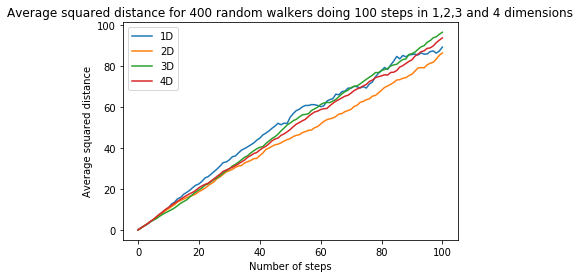

In [56]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)
squaredpositions1 = []
squaredpositions2 = []
squaredpositions3 = []
squaredpositions4 = []
for i in range(400):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    ysq1 = [i**2 for i in ys]
    ysq1 = numpy.array(ysq1)
    squaredpositions1.append(ysq1)
for i in range(400):
    w = walker(numpy.zeros(2),2)
    ys = w.doSteps(nsteps)
    ysq2 = []
    for b in range(101):
        ysq2.append((ys[b,0]**2)+(ys[b,1]**2))
    squaredpositions2.append(ysq2)
for i in range(400):
    w = walker(numpy.zeros(3),3)
    ys = w.doSteps(nsteps)
    ysq3 = []
    for b in range(101):
        ysq3.append((ys[b,0]**2)+(ys[b,1]**2)+(ys[b,2]**2))
    squaredpositions3.append(ysq3)
for i in range(400):
    w = walker(numpy.zeros(4),4)
    ys = w.doSteps(nsteps)
    ysq4 = []
    for b in range(101):
        ysq4.append((ys[b,0]**2)+(ys[b,1]**2)+(ys[b,2]**2)+(ys[b,3]**2))
    squaredpositions4.append(ysq4)

squaredpositions1=numpy.array(squaredpositions1)
squaredpositions2=numpy.array(squaredpositions2)
squaredpositions3=numpy.array(squaredpositions3)
squaredpositions4=numpy.array(squaredpositions4)
avsquaredpositions1 = [numpy.mean(squaredpositions1[:,i]) for i in range(101)]
avsquaredpositions2 = [numpy.mean(squaredpositions2[:,i]) for i in range(101)]
avsquaredpositions3 = [numpy.mean(squaredpositions3[:,i]) for i in range(101)]
avsquaredpositions4 = [numpy.mean(squaredpositions4[:,i]) for i in range(101)]
plt.plot(range(nsteps+1),avsquaredpositions1,label="1D")
plt.plot(range(nsteps+1),avsquaredpositions2,label="2D")
plt.plot(range(nsteps+1),avsquaredpositions3,label="3D")
plt.plot(range(nsteps+1),avsquaredpositions4,label="4D")
plt.legend(loc="best")
plt.xlabel("Number of steps")
plt.ylabel("Average squared distance")
plt.title("Average squared distance for 400 random walkers doing 100 steps in 1,2,3 and 4 dimensions")

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer.


0.16972384


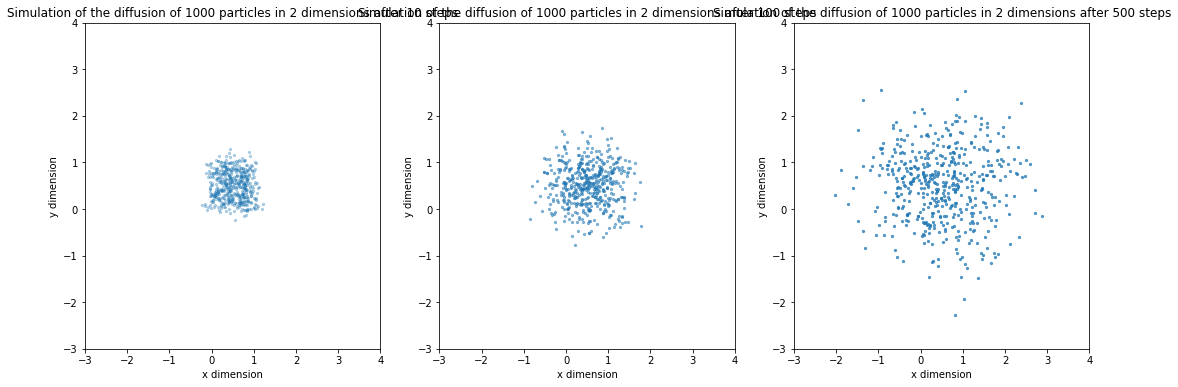

In [90]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))
allpositions = []
for i in range(500):
    w=walker(rand_pos[i],2,0.05)
    ys=w.doSteps(1000)
    allpositions.append(ys)
allpositions = numpy.array(allpositions)
print(allpositions[499,1000,0])
# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("Simulation of the diffusion of 1000 particles in 2 dimensions after "+str(nsteps)+" steps")
    plt.xlabel("x dimension")
    plt.ylabel("y dimension")
    alphavalue=((i*0.2)+0.3)
    plt.scatter(allpositions[:,nsteps,0], allpositions[:,nsteps,1], alpha=alphavalue,s=5)